# Tools

In [1]:
import h5py, numpy as np, tqdm, os, glob
from matplotlib import pyplot as plt

In [149]:
import matplotlib
matplotlib.rc('font', size=16, family='serif')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [2]:
# %matplotlib widget
%matplotlib inline

# Data

In [3]:
ls /data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/

OB/  SampleMixture/  SampleStack/


In [4]:
ls /data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/

boa2021n000553.hdf  boa2021n000571.hdf  boa2021n000589.hdf  boa2021n000608.hdf
boa2021n000555.hdf  boa2021n000573.hdf  boa2021n000592.hdf  boa2021n000610.hdf
boa2021n000557.hdf  boa2021n000575.hdf  boa2021n000594.hdf  boa2021n000612.hdf
boa2021n000559.hdf  boa2021n000577.hdf  boa2021n000596.hdf  boa2021n000614.hdf
boa2021n000561.hdf  boa2021n000579.hdf  boa2021n000598.hdf  boa2021n000616.hdf
boa2021n000563.hdf  boa2021n000581.hdf  boa2021n000600.hdf  boa2021n000618.hdf
boa2021n000565.hdf  boa2021n000583.hdf  boa2021n000602.hdf  boa2021n000620.hdf
boa2021n000567.hdf  boa2021n000585.hdf  boa2021n000604.hdf  boa2021n000622.hdf
boa2021n000569.hdf  boa2021n000587.hdf  boa2021n000606.hdf  boa2021n000625.hdf


In [5]:
obf = h5py.File('/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/OB/boa2021n000591.hdf')
sample1f = h5py.File('/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000553.hdf')

In [6]:
obdata = obf['entry']['data']['data']
sample1data = sample1f['entry']['data']['data']
obdata.shape

(11, 1024, 1024)

# Use the fast cos wave fitting method to obtain signals

In [7]:
def calcPhase(data, niter=5, dc=297.):
    data = np.array(data)-dc
    shape = data.shape[1:]
    o = np.zeros(shape)
    a_c = np.zeros(shape)
    a_s = np.zeros(shape)
    cp = np.cos(phi)
    sp = np.sin(phi)
    for i in range(niter):
        y = np.multiply.outer(cp, a_c) + np.multiply.outer(sp, a_s) + o[np.newaxis, :]
        o1 = o + np.mean((data-y), axis=0)
        a_s1 = np.mean((data-y)*sp[:, np.newaxis, np.newaxis], axis=0)*2 + a_s
        a_c1 = np.mean((data-y)*cp[:, np.newaxis, np.newaxis], axis=0)*2 + a_c
        o, a_s, a_c = o1, a_s1, a_c1
    return o, a_s, a_c

## Explore

In [8]:
obf = h5py.File('/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/OB/boa2021n000591.hdf')
sample1f = h5py.File('/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000553.hdf')

In [9]:
obdata = obf['entry']['data']['data']
sample1data = sample1f['entry']['data']['data']
obdata.shape

(11, 1024, 1024)

In [10]:
i = np.arange(11.)
phi = i/11*np.pi*2

### Visibility and phase change

In [11]:
o1, a_s1, a_c1 = calcPhase(obdata, niter=1)
print(o1[500, 500], a_s1[500, 500], a_c1[500, 500], a_s1[500, 500]/a_c1[500, 500])
ob_phase = np.arctan2(-a_c1, a_s1)
ob_vis = np.sqrt(a_c1*a_c1+a_s1*a_s1)/o1

2694.6363636363635 -635.3409335561254 438.2822165389503 -1.4496160455090297


In [12]:
o1, a_s1, a_c1 = calcPhase(sample1data, niter=1)
a1 =  np.sqrt(a_c1*a_c1+a_s1*a_s1)
sample1_phase = np.arctan2(-a_c1, a_s1)
sample1_vis = a1/o1

### Plot phase

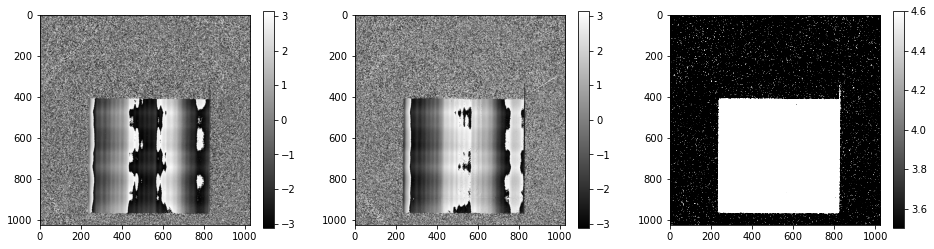

In [13]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.imshow(ob_phase, cmap='gray')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(sample1_phase, cmap='gray')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow((sample1_phase-ob_phase)%(2*np.pi), cmap='gray')
plt.clim(3.5, 4.6)
plt.colorbar()

### Plot Dark field

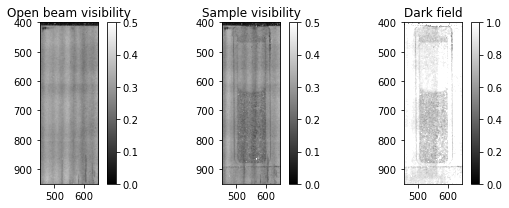

In [14]:
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.title('Open beam visibility')
plt.imshow(ob_vis, cmap='gray')
plt.colorbar()
plt.clim(0, .5)
xlims = 450, 650
ylims = 950, 400
plt.xlim(*xlims); plt.ylim(*ylims)
plt.subplot(1,3,2)
plt.title('Sample visibility')
plt.imshow(sample1_vis, cmap='gray')
plt.colorbar()
plt.xlim(*xlims); plt.ylim(*ylims)
plt.clim(0, .5)
plt.subplot(1,3,3)
plt.title('Dark field')
plt.imshow(sample1_vis/ob_vis, cmap='gray')
plt.xlim(*xlims); plt.ylim(*ylims)
plt.clim(0, 1)
plt.colorbar()
plt.tight_layout()

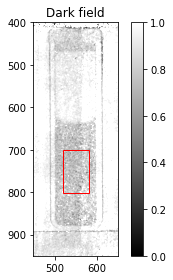

In [15]:
fig, ax = plt.subplots(figsize=(4,4))
plt.title('Dark field')
plt.imshow(sample1_vis/ob_vis, cmap='gray')

import matplotlib.patches as patches
rect = patches.Rectangle((520, 700), 62, 101, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.xlim(*xlims); plt.ylim(*ylims)
plt.clim(0, 1)
plt.colorbar()
plt.tight_layout()

# Compute all

In [16]:
files = glob.glob("/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/*.hdf")

In [17]:
sample_files = sorted(files)[:]
#sample_files

In [18]:
sample_vis_images = {}
for f in sample_files:
    print(f)
    sample1data = h5py.File(f)['entry']['data']['data']
    k = os.path.basename(f)
    k = k.split('000')[-1].rstrip('.hdf')
    print(k)
    try:
        o1, a_s1, a_c1 = calcPhase(sample1data, niter=1)
    except:
        print(f"{f}: failed")
        sample_vis_images[k] = None
        continue
    # sample1_phase = np.arctan2(-a_c1, a_s1)
    a1 =  np.sqrt(a_c1*a_c1+a_s1*a_s1)
    sample1_phase = np.arctan2(-a_c1, a_s1)
    sample1_vis = a1/o1
    sample_vis_images[k]=sample1_vis

/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000553.hdf
553
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000555.hdf
555
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000557.hdf
557
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000559.hdf
559
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000561.hdf
561
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000563.hdf
563
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000565.hdf
565
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000567.hdf
567
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000569.hdf
569
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000571.hdf
571
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_sample

In [19]:
keys = sorted(list(sample_vis_images.keys()))
len(keys)

36

In [20]:
Ls = [145-np.array(h5py.File(f)['entry/table5/sgtz']).mean()+6 for f in sample_files] # in mm
Ls = np.array(Ls)*1e-3 # in m
Ls*100

array([ 0.6 ,  0.85,  1.1 ,  1.35,  1.6 ,  1.85,  2.1 ,  2.35,  2.6 ,
        2.85,  3.1 ,  3.35,  3.6 ,  3.85,  4.1 ,  4.35,  4.6 ,  4.85,
        5.1 ,  5.6 ,  6.1 ,  6.6 ,  7.1 ,  7.6 ,  8.1 ,  8.6 ,  9.1 ,
        9.6 , 10.1 , 10.6 , 11.1 , 11.6 , 12.1 , 12.6 , 13.6 , 15.1 ])

In [21]:
wl = 2.8e-10
wl = 3.75e-10
p = 13e-6
p = 25e-6
xi = wl*Ls/p
xi*1e6

array([0.09  , 0.1275, 0.165 , 0.2025, 0.24  , 0.2775, 0.315 , 0.3525,
       0.39  , 0.4275, 0.465 , 0.5025, 0.54  , 0.5775, 0.615 , 0.6525,
       0.69  , 0.7275, 0.765 , 0.84  , 0.915 , 0.99  , 1.065 , 1.14  ,
       1.215 , 1.29  , 1.365 , 1.44  , 1.515 , 1.59  , 1.665 , 1.74  ,
       1.815 , 1.89  , 2.04  , 2.265 ])

In [22]:
sl = slice(700, 800), slice(530, 550)
sl = slice(700, 800), slice(520, 540)
obv = np.mean(ob_vis[sl])

sv = []
for k in keys:
    im = sample_vis_images[k]
    if im is not None:
        sv.append(np.mean(im[sl]))
    else:
        sv.append(None)

x = []; y = []
for x1,y1 in zip(xi, sv):
    if y1 is None: continue
    x.append(x1)
    y.append(y1)
x = np.array(x)
y = np.array(y)

y/obv

array([0.76039991, 0.80671272, 0.80118408, 0.75745594, 0.71050025,
       0.69537173, 0.6911571 , 0.69016257, 0.66542409, 0.67841599,
       0.68772941, 0.67745067, 0.67647469, 0.66622958, 0.64287236,
       0.63470784, 0.62352686, 0.60722219, 0.59470435, 0.55441592,
       0.55431366, 0.54150054, 0.53635806, 0.52834029, 0.5131519 ,
       0.50493965, 0.50806622, 0.49539898, 0.49161062, 0.47861426,
       0.4708687 , 0.46411638, 0.46923897, 0.46247654, 0.42982999,
       0.40859833])

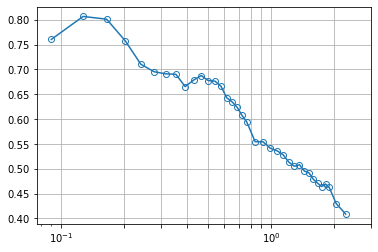

In [23]:
plt.figure()
plt.plot(x*1e6, y/obv, 'o-', mfc='none')
plt.xscale('log')
plt.xticks(list(np.arange(0.1, 1.01, 0.1)) + [2., 3.])
plt.grid()

In [24]:
lnVs_over_V0_divby_lambdasq = np.log(y/obv)/wl/wl

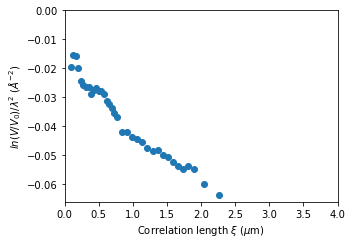

In [25]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, lnVs_over_V0_divby_lambdasq*1e-20, 'o')
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 4)
plt.ylim(None, 0)
plt.tight_layout()

## !!! **Don't run this** A different way of OB normalization - **not realy working when considering later similar section in "Normalize by BG near sample"

In [33]:
obave = np.mean(obdata, axis=0)
obave.shape

(1024, 1024)

In [37]:
sample_vis_images = {}
for f in sample_files:
    print(f)
    sample1data = h5py.File(f)['entry']['data']['data']
    k = os.path.basename(f)
    k = k.split('000')[-1].rstrip('.hdf')
    print(k)
    try:
        o1, a_s1, a_c1 = calcPhase(sample1data, niter=1)
    except:
        print(f"{f}: failed")
        sample_vis_images[k] = None
        continue
    # sample1_phase = np.arctan2(-a_c1, a_s1)
    a1 =  np.sqrt(a_c1*a_c1+a_s1*a_s1)
    sample1_phase = np.arctan2(-a_c1, a_s1)
    sample1_vis = a1/o1
    sample_vis_images[k]=sample1_vis

/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000553.hdf
553
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000555.hdf
555
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000557.hdf
557
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000559.hdf
559
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000561.hdf
561
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000563.hdf
563
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000565.hdf
565
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000567.hdf
567
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000569.hdf
569
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000571.hdf
571
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_sample

In [38]:
sl = slice(700, 800), slice(530, 550)

sv = []
for k in keys:
    im = sample_vis_images[k]
    if im is not None:
        sv.append(np.mean(im[sl]/ob_vis[sl]))
    else:
        sv.append(None)

x = []; y = []
for x1,y1 in zip(xi, sv):
    if y1 is None: continue
    x.append(x1)
    y.append(y1)
x = np.array(x)
y = np.array(y)

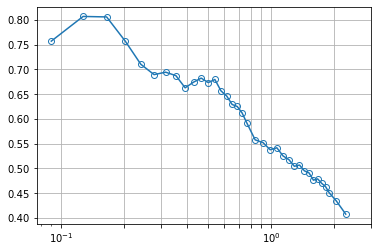

In [39]:
plt.figure()
plt.plot(x*1e6, y, 'o-', mfc='none')
plt.xscale('log')
plt.xticks(list(np.arange(0.1, 1.01, 0.1)) + [2., 3.])
plt.grid()

# Normalize by background near the sample

In [26]:
# sample_bg_sl = slice(700,800), slice(640, 640+62)
# sample_bg_sl = slice(700,800), slice(640, 640+32)
# sample_bg_sl = slice(700,800), slice(420, 420+62)
# sample_bg_sl = slice(500, 600), slice(530, 550)
sample_bg_sl = slice(500, 600), slice(520, 540)
sample_bg_v = []
for k in keys:
    im = sample_vis_images[k]
    if im is not None:
        sample_bg_v.append(np.mean(im[sample_bg_sl]))
    else:
        sample_bg_v.append(None)

sample_bg_y = []
for y1, sample_bg_y1 in zip(sv, sample_bg_v):
    if y1 is None: continue
    sample_bg_y.append(sample_bg_y1)
sample_bg_y = np.array(sample_bg_y)

sample_bg_y/obv

array([0.92898033, 0.9989362 , 1.00219883, 0.96640637, 0.93700578,
       0.92940906, 0.93818672, 0.95388807, 0.96180887, 0.98270398,
       0.99023513, 0.99365983, 0.99056769, 0.97766854, 0.97032814,
       0.96032243, 0.94204046, 0.94119176, 0.93355085, 0.92669854,
       0.93641438, 0.94412911, 0.95735978, 0.96003622, 0.974806  ,
       0.97681716, 0.98188858, 0.99090037, 0.99178035, 0.99696833,
       0.99032965, 0.99664151, 1.00043111, 1.00402689, 0.99845135,
       0.99018426])

Text(0, 0.5, '$V/V_0$')

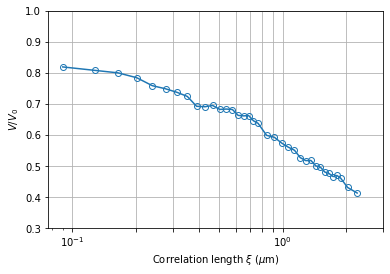

In [27]:
plt.figure()
plt.plot(x*1e6, (y/obv)/(sample_bg_y/obv), 'o-', mfc='none')
plt.xscale('log')
plt.xticks(list(np.arange(0.1, 1.01, 0.1)) + [2., 3.])
plt.grid()
plt.ylim(0.3, 1)
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
# plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.ylabel(r'$V/V_0$')

## !!! **Don't run this** A different way of OB normalization - **not working**

In [91]:
sl = slice(700, 800), slice(530, 550)

sv = []
for k in keys:
    im = sample_vis_images[k]
    if im is not None:
        sv.append(np.mean(im[sl]/ob_vis[sl]))
    else:
        sv.append(None)

x = []; y = []
for x1,y1 in zip(xi, sv):
    if y1 is None: continue
    x.append(x1)
    y.append(y1)
x = np.array(x)
y = np.array(y)

In [92]:
sample_bg_sl = slice(700,800), slice(640, 640+62)
sample_bg_sl = slice(500, 600), slice(530, 550)

sample_bg_v = []
for k in keys:
    im = sample_vis_images[k]
    if im is not None:
        sample_bg_v.append(np.mean(im[sample_bg_sl]/ob_vis[sample_bg_sl]))
    else:
        sample_bg_v.append(None)

sample_bg_y = []
for y1, sample_bg_y1 in zip(sv, sample_bg_v):
    if y1 is None: continue
    sample_bg_y.append(sample_bg_y1)
sample_bg_y = np.array(sample_bg_y)

Text(0, 0.5, '$V/V_0$')

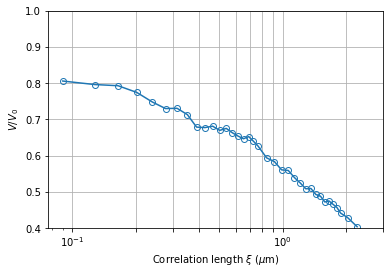

In [93]:
plt.figure()
plt.plot(x*1e6, y/sample_bg_y, 'o-', mfc='none')
plt.xscale('log')
plt.xticks(list(np.arange(0.1, 1.01, 0.1)) + [2., 3.])
plt.grid()
plt.ylim(0.4, 1)
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
# plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.ylabel(r'$V/V_0$')

## !!! **Don't need to run this. it is for debugging** The point with lowest correlation length is not good. investigate

Matteo comment: Sometimes when the sample’s very close to the grating 2 we get quite worse fringe artifacts than usual from the oscillation fit processing. Other reason could be impact from the incoherent scattering background, which should in general have larger impact at short distances.

**Turns out the lesson is to look at the sample visibility normalized OB visibility (see plot below. see the fringes) and it is clear that we should use the region just on top of the solution but inside the tube for "normalize by background"**

manually check the data

In [49]:
sample1f = h5py.File('/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000553.hdf')
sample2f = h5py.File('/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleMixture/boa2021n000555.hdf')

In [50]:
sample1data = sample1f['entry']['data']['data']
sample2data = sample2f['entry']['data']['data']

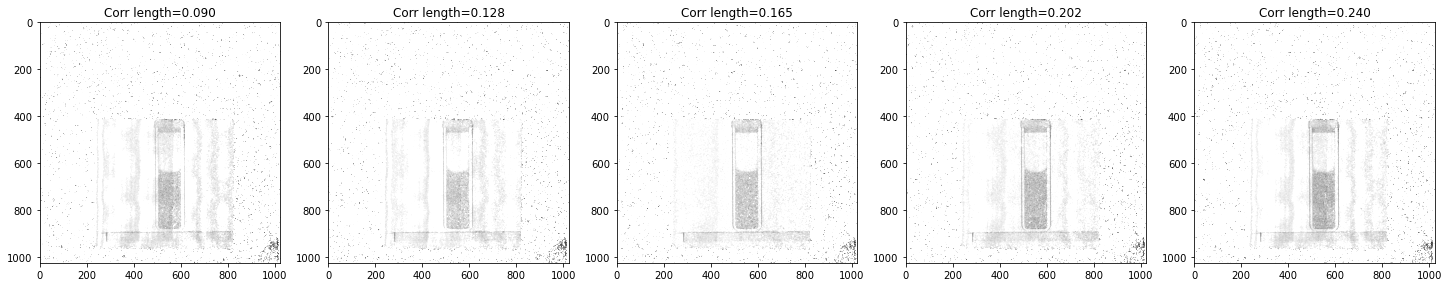

In [75]:
fig, axes = plt.subplots(1, 5, figsize=(5*5, 5))
for j in range(5):
    axes[j].set_title(f"Corr length={x[j]*1e6:.3f}")
    axes[j].imshow(sample_vis_images[keys[j]]/ob_vis, cmap='gray', vmin=0, vmax=1)

this is not really useful

This is raw data and not really useful for this particular diagnosis but interesting to see sometimes

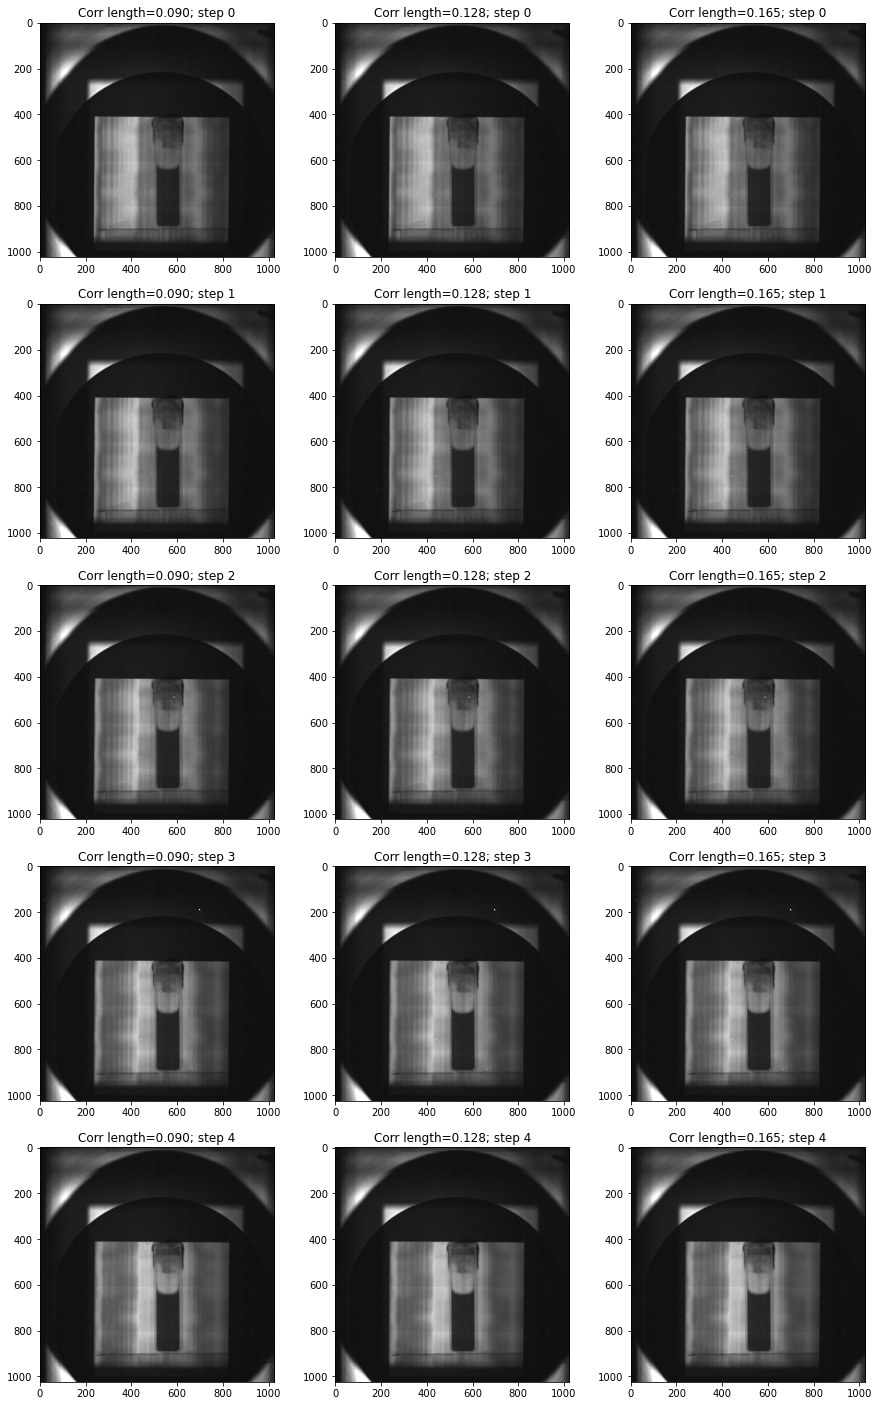

In [46]:
N = 5
npositions = 3
fig, axes = plt.subplots(N, npositions, figsize=(5*npositions,5*N))
vmin, vmax = 0, 5000
for i in range(N):
    for j in range(npositions):
        axes[i,j].set_title(f"Corr length={x[j]*1e6:.3f}; step {i}")
        axes[i,j].imshow(sample1data[i], cmap='gray', vmin=vmin, vmax=vmax)

## $ln(V/V_0)/\lambda^2$

In [28]:
lnVs_over_V0_divby_lambdasq = np.log((y/obv)/(sample_bg_y/obv))/wl/wl

In [151]:
lnVs_over_V0 = np.log((y/obv)/(sample_bg_y/obv))

In [152]:
np.savetxt("lnVs_over_V0-mixture.dat", np.array([x*1e6, lnVs_over_V0]).T)

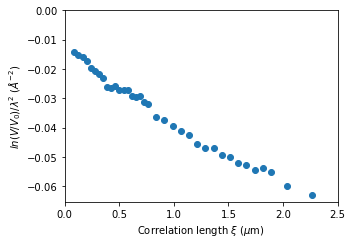

In [69]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, lnVs_over_V0_divby_lambdasq*1e-20, 'o')
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 2.5)
plt.ylim(None, 0)
plt.tight_layout()

These parameters are from Matteo

In [30]:
t = 5e-3
r = 0.35e-6
phi = 0.117
delta_rho = 129e12

This is using the method of treating one single radius

In [31]:
G_minus_one = lnVs_over_V0_divby_lambdasq/(3./2)/phi/delta_rho/delta_rho/r/t

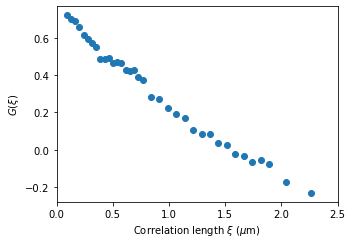

In [32]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, G_minus_one+1, 'o')
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$G(\xi)$')
plt.xlim(0, 2.5)
plt.tight_layout()

### Trying fitting using two radii

For solution with particles of one single radius

$\ln \frac{V}{V0} = {\Sigma (G-1) t}$

$\Sigma_s = \frac{3}{2}\phi_V \Delta\rho^2\lambda^2 r$

or
$\ln \frac{V}{V0} = {\frac{3}{2}\phi_V \Delta\rho^2\lambda^2 r (G-1) t}$

or
$\ln \frac{V}{V0}/\lambda^2 = {\frac{3}{2}\phi_V \Delta\rho^2 t \times r (G-1) }$

For a solution of particles of two radii

$\ln \frac{V}{V0}/\lambda^2 = {\frac{3}{2}\phi_V \Delta\rho^2 t \times \left[w_1r_1 (G(\xi, r_1)-1) + w_2r_2 (G(\xi, r_2)-1) \right] }$


In [33]:
r2 = 1e-6

In [34]:
r

3.5e-07

In [37]:
def G(zeta):
    zeta2 = zeta*zeta
    return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))

/tmp/ipykernel_3316186/2097248867.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))
/tmp/ipykernel_3316186/2097248867.py:3: RuntimeWarning: divide by zero encountered in log
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))
/tmp/ipykernel_3316186/2097248867.py:3: RuntimeWarning: invalid value encountered in multiply
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))


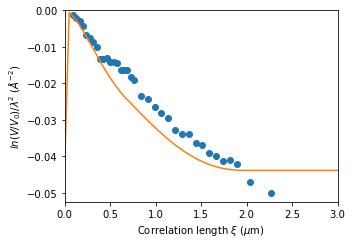

In [71]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, lnVs_over_V0_divby_lambdasq*1e-20 +0.013, 'o')
r = 0.35e-6
r2 = 1e-6
t=0.005
xprime = np.linspace(0, 5, 100)*1e-6
G1 = G(xprime/r)
G1[G1!=G1]=0
G2 = G(xprime/r2)
G2[G2!=G2]=0
w = 0.5
plt.plot(xprime*1e6, (2/3.)*phi*delta_rho*delta_rho*t*1e-20*(w*r*(G1-1)+(1-w)*r2*(G2-1)))
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 3)
plt.ylim(None, 0)
plt.tight_layout()

/tmp/ipykernel_3316186/2097248867.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))


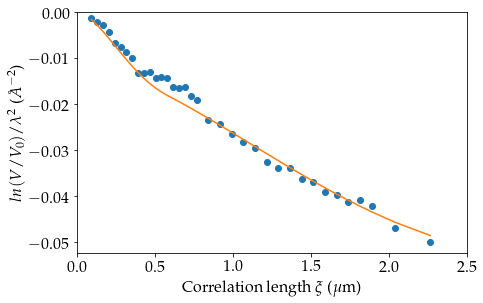

In [150]:
plt.figure(figsize=(7,4.5))
plt.plot(x*1e6, lnVs_over_V0_divby_lambdasq*1e-20 +0.013, 'o')
r = 0.3e-6
r2 = 1.6e-6
G1 = G(x/r)
G1[G1!=G1]=0
G2 = G(x/r2)
G2[G2!=G2]=0
w = 0.6
plt.plot(x*1e6, (2/3.)*phi*delta_rho*delta_rho*t*1e-20*(w*r*(G1-1)+(1-w)*r2*(G2-1)))
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 2.5)
plt.ylim(None, 0)
plt.tight_layout()

/tmp/ipykernel_3316186/2097248867.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))


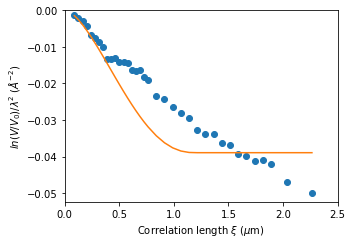

In [135]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, lnVs_over_V0_divby_lambdasq*1e-20 +0.013, 'o')
r1 = r = 0.35e-6
r2 = 1.35e-6
r3 = 0.6e-6
G1 = G(x/r)
G1[G1!=G1]=0
G2 = G(x/r2)
G2[G2!=G2]=0
G3 = G(x/r3)
G3[G3!=G3]=0
w1= 0
w2 = 0.
w3 = 1-w1-w2
plt.plot(x*1e6, (2/3.)*phi*delta_rho*delta_rho*t*1e-20*(w1*r1*(G1-1)+w2*r2*(G2-1)+w3*r3*(G3-1)))
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 2.5)
plt.ylim(None, 0)
plt.tight_layout()